In [114]:
import pandas as pd
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geodatasets
import folium
import requests
import requests
import branca.colormap as cm
import os
from http.server import HTTPServer, SimpleHTTPRequestHandler
import threading
import webbrowser

# declear the function to plot choropleth

In [115]:
def create_choropleth(df: pd.DataFrame,
                                   columns: list):
                
    map = folium.Map(location=(-6.37, 34.52), zoom_start=6)
    
    tanzania = requests.get("https://raw.githubusercontent.com/thadk/GeoTZ/master/TZA_adm1_mkoaTZ.geojson").json()
    

    folium.Choropleth(
        geo_data=tanzania,
        data=df,
        key_on=f"feature.properties.NAME_1",
        fill_color="YlGn",
        columns=columns,
        fill_opacity=0.3,
        line_weight=2,
    ).add_to(map)


    return map


In [116]:
def display_html(html_file:str):
    # Path to your HTML file
    # html_file = "../output/cleaned_functional_rate.html"  # change this

    # Change working directory to the folder containing your HTML file
    os.chdir(os.path.dirname(os.path.abspath(html_file)))

    # Choose a port (e.g., 8000)
    PORT = 8000

    # Start a simple HTTP server in the background
    server = HTTPServer(('localhost', PORT), SimpleHTTPRequestHandler)
    thread = threading.Thread(target=server.serve_forever)
    thread.daemon = True
    thread.start()

    # Generate and open the URL in Chrome (or default browser)
    url = f"http://localhost:{PORT}/{os.path.basename(html_file)}"
    print("Your HTML is available at:", url)
    webbrowser.open(url)


# Perform geospatial analysis and feature analysis with cleaned data 

In [117]:
pd.set_option('display.max_columns', None) # show full dataframe

In [118]:
# import data
train_val = pd.read_csv("../data/training_set_values.csv")
train_label = pd.read_csv("../data/training_set_labels.csv")

In [119]:
# merge train_set_values and train_set_labels on ID
train_data = pd.merge(train_val, train_label, on="id")

# convert data type of "date_recorded" into datetime object since we can't see the timeline with string 
train_data["date_recorded"] = pd.to_datetime(train_data['date_recorded'])
type(train_data["date_recorded"][0])

# train_data

C:\Users\Owner\AppData\Local\Temp\ipykernel_15120\2180619718.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data["date_recorded"] = pd.to_datetime(train_data['date_recorded'])


pandas._libs.tslibs.timestamps.Timestamp

In [120]:
# extract year from date_recorded
train_data["year_recorded"] = pd.DatetimeIndex(train_data["date_recorded"]).year
train_data["diff_year"] = train_data["year_recorded"] - train_data["construction_year"]
train_data.loc[train_data["diff_year"]<0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,diff_year
8729,20198,0.0,2004-05-01,Government Of Tanzania,86,DWE,38.959776,-5.247278,Kwa Bi Shoga,0,Pangani,Mapojoni Kati,Tanga,4,4,Muheza,Ngomeni,120,True,GeoData Consultants Ltd,VWC,Borehole,True,2008,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty abandoned,salty,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,2004,-4
10441,55069,20.0,2004-12-01,Plan Int,307,DDCA,38.768656,-7.298419,Mianzi Primary School,0,Rufiji,Momboni,Pwani,60,33,Kisarawe,Msanga,1,True,GeoData Consultants Ltd,VWC,NaN,False,2006,india mark iii,india mark iii,handpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,hand pump,hand pump,non functional,2004,-2
13366,48759,100.0,2004-06-01,Mgaya,1331,Mgaya,34.290885,-1.699609,Maro Mgaya,0,Lake Victoria,Kibaoni,Mara,20,2,Serengeti,Kenyamonta,80,NaN,GeoData Consultants Ltd,Other,NaN,True,2011,other - rope pump,rope pump,rope pump,other,other,pay per bucket,per bucket,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2004,-7
23373,20534,50.0,2004-03-01,Tasaf And Lga,239,TASAFcitizen and LGA,39.272736,-11.019000,Juhudi,0,Ruvuma / Southern Coast,Mwanona,Mtwara,90,33,Newala,Luchingu,317,True,GeoData Consultants Ltd,VWC,Mwanona,False,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe,functional,2004,-5
27501,53086,500.0,2004-01-07,Kkkt,1611,Villagers,34.900561,-8.873813,Kwa Barnabasi Kilumile,0,Rufiji,Mlowa,Iringa,11,4,Njombe,Makambako,65,True,GeoData Consultants Ltd,VWC,NaN,False,2009,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,functional,2004,-5
32619,9195,0.0,2004-03-01,Caltus,1856,Cultus,31.539761,-7.983106,Kwa Pambajila,0,Lake Tanganyika,Magomeni,Rukwa,15,4,Sumbawanga Urban,Kasense,900,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa kasen,True,2005,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,2004,-1
33942,5971,0.0,2004-03-01,Amref,-27,AMREF,39.283105,-7.422852,Kwa Ndevu,0,Rufiji,Gundani,Pwani,6,4,Mkuranga,Magawa,200,True,GeoData Consultants Ltd,VWC,NaN,False,2007,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,2004,-3
39559,15921,0.0,2004-03-06,Tasafu,301,DWE,38.558421,-5.140405,Shuleni,0,Pangani,Kiwanjani,Tanga,4,2,Korogwe,Kwagunda,713,True,GeoData Consultants Ltd,VWC,NaN,False,2009,other,other,other,vwc,user-group,never pay,never pay,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,non functional,2004,-5
48555,1251,0.0,2004-12-01,African 2000 Network,284,Karugendo,38.929212,-7.111349,Kauzeni Primary School 2,0,Wami / Ruvu,Kauzeni Chini,Pwani,60,33,Kisarawe,Kibuta,185,True,GeoData Consultants Ltd,Private operator,NaN,False,2008,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2004,-4


In [ ]:
# drop row if 
# date_recorded - construction_year < 0

cleaned_df = train_data[(train_data["diff_year"] >= 0)]
len(cleaned_df)

59391

In [ ]:
# check out which feature can be good

# features = ["basin", "extraction_type", "extraction_type_class", "extraction_type_group", 
#             "management_group", "water_quality", "waterpoint_type", "waterpoint_type_group","status_group"]

In [ ]:
# check out which feature can be good

# features = ["basin", "source","management_group", "management", "quality_group", "payment",
#             "region", "payment_type", "quantity_group", "extraction_type_class", 
#             "waterpoint_type_group",
#             "construction_year", "gps_height", "population", "status_group"]

In [ ]:
# my proposal of feature selection

features =  ["quantity_group", "region", "payment_type", "extraction_type_class",
             "management", "quality_group", "gps_height", "status_group"]

In [125]:
cleaned_df = cleaned_df[features]
cleaned_df.fillna("unknown")
# cleaned_df = train_data

,quantity_group,region,payment_type,extraction_type_class,management,quality_group,gps_height,status_group
0,enough,Iringa,annually,gravity,vwc,good,1390,functional
1,insufficient,Mara,never pay,gravity,wug,good,1399,functional
2,enough,Manyara,per bucket,gravity,vwc,good,686,functional
3,dry,Mtwara,never pay,submersible,vwc,good,263,non functional
4,seasonal,Kagera,never pay,gravity,other,good,0,functional
...,...,...,...,...,...,...,...,...
59395,enough,Kilimanjaro,per bucket,gravity,water board,good,1210,functional
59396,enough,Iringa,annually,gravity,vwc,good,1212,functional
59397,enough,Mbeya,monthly,handpump,vwc,fluoride,0,functional
59398,insufficient,Dodoma,never pay,handpump,vwc,good,0,functional


In [126]:
import numpy as np
# Missing values are NaN (e.g. null) or zero value or unknown
# So, find the missing values

columns_null = []
columns_zero = []
columns_unknown = []


for col in cleaned_df.columns:

    # search columns which contain null
    if cleaned_df[col].isna().values.any() == True:
        columns_null.append(col)
        
    # search columns which contain zero
    elif 0 in cleaned_df[col].unique():
        columns_zero.append(col)

    # search columns which contain unknown
    elif "unknown" in cleaned_df[col].unique():
        columns_unknown.append(col)
        
    elif "Unknown" in cleaned_df[col].unique():
        columns_unknown.append(col)


# count the number of rows containing null and create a data frame
null_data = pd.DataFrame(cleaned_df[columns_null].isna().sum()).reset_index()
null_data.columns = ["col_name", "num_of_null"]
null_data["percent_of_null"] = null_data["num_of_null"] / len(cleaned_df)*100

# count the number of rows containing zero and create a data frame
zero_data = pd.DataFrame(cleaned_df[columns_zero].isin([0]).sum()).reset_index()
zero_data.columns = ["col_name", "num_of_zero"]
zero_data["percent_of_zero"] = zero_data["num_of_zero"] / len(cleaned_df)*100

# count the number of rows containing unknown and create a data frame
unknown_data = pd.DataFrame(cleaned_df[columns_unknown].isin(["unknown", "Unknown"]).sum()).reset_index()
unknown_data.columns = ["col_name", "num_of_unknown"]
unknown_data["percent_of_unknown"] = unknown_data["num_of_unknown"] / len(cleaned_df) * 100

# merging all dataframes
missing_value = pd.merge(null_data, zero_data, how="outer", sort=True)
missing_value = pd.merge(missing_value, unknown_data, how="outer", sort=True)
missing_value = missing_value.replace(np.nan, 0)

# counts sum of missing values and calculate percentage
missing_value["sum_of_missing_value"] = missing_value["num_of_null"] + missing_value["num_of_zero"] + missing_value["num_of_unknown"]
missing_value["percent_of_missing_value"] = missing_value["sum_of_missing_value"] / len(cleaned_df) * 100 
missing_value

,col_name,num_of_null,percent_of_null,num_of_zero,percent_of_zero,num_of_unknown,percent_of_unknown,sum_of_missing_value,percent_of_missing_value
0,gps_height,0.0,0.0,20438.0,34.412621,0.0,0.000000,20438.0,34.412621
1,management,0.0,0.0,0.0,0.000000,561.0,0.944588,561.0,0.944588
2,payment_type,0.0,0.0,0.0,0.000000,8157.0,13.734404,8157.0,13.734404
3,quality_group,0.0,0.0,0.0,0.000000,1876.0,3.158728,1876.0,3.158728
4,quantity_group,0.0,0.0,0.0,0.000000,789.0,1.328484,789.0,1.328484


## Geo spatial analysis

In [127]:
# show the functional rate by region

stats = (
    cleaned_df.groupby("region")["status_group"]
      .apply(lambda s: (s == "functional").mean() * 100.0)
      .reset_index(name="functional_pct")
)

map = create_choropleth(df=stats,
                        columns=["region", "functional_pct"])

map.save("../output/cleaned_functional_rate.html")

# Generate and open the html file with URL in Chrome
display_html(html_file="../output/cleaned_functional_rate.html")


Your HTML is available at: http://localhost:8000/cleaned_functional_rate.html


In [128]:
# show non functional rate by region

stats = (
    cleaned_df.groupby("region")["status_group"]
      .apply(lambda s: (s == "non functional").mean() * 100.0)
      .reset_index(name="functional_pct")
)

map = create_choropleth(df=stats,
                        columns=["region", "functional_pct"])

map.save("../output/cleaned_non_functional_rate.html")

display_html(html_file="../output/cleaned_non_functional_rate.html")


Your HTML is available at: http://localhost:8000/cleaned_non_functional_rate.html


In [129]:
# show functional needs repair rate by region

stats = (
    cleaned_df.groupby("region")["status_group"]
      .apply(lambda s: (s == "functional needs repair").mean() * 100.0)
      .reset_index(name="repair_pct")
)

map = create_choropleth(df=stats,
                        columns=["region", "repair_pct"])

map.save("../output/cleaned_functional_needs_repair_rate.html")

display_html(html_file="../output/cleaned_functional_needs_repair_rate.html")


Your HTML is available at: http://localhost:8000/cleaned_functional_needs_repair_rate.html


In [130]:
# Show gps_height by region

stats = cleaned_df.groupby("region")["gps_height"] \
            .mean() \
            .reset_index(name="mean_gps_height")

map = create_choropleth(df=stats,
                        columns=["region", "mean_gps_height"])

map.save("../output/cleaned_mean_gps_height.html")

display_html(html_file="../output/cleaned_mean_gps_height.html")


Your HTML is available at: http://localhost:8000/cleaned_mean_gps_height.html


In [131]:
# show top 5 region where the functionality is non functional

functionality_rate = pd.DataFrame(cleaned_df.groupby("region")["status_group"].value_counts())
functionality_rate["percent"] = functionality_rate["count"] / len(cleaned_df) * 100

functionality_rate = functionality_rate.reset_index().drop(columns="count")
functionality_rate = functionality_rate.loc[functionality_rate["status_group"]=="non functional"]
non_functional_rate = functionality_rate.sort_values(by="percent", ascending=False).head(5)
non_functional_rate

,region,status_group,percent
31,Mbeya,non functional,3.057702
34,Morogoro,non functional,2.672122
52,Shinyanga,non functional,2.623293
19,Kilimanjaro,non functional,2.385883
40,Mwanza,non functional,2.385883


## Feature analysis

### chi square test

In [132]:
# create dataframe only with categorical data

df_categorical= pd.DataFrame(data = cleaned_df.dtypes, columns = ['a']).reset_index()

categorical_variables = list(df_categorical['index'].loc[df_categorical['a'] == 'object'])
df_categorical = cleaned_df[categorical_variables]

print(df_categorical.shape)


(59391, 7)


In [133]:
# perform chi square test

# reference: https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables

factors_paired = [(i,j) for i in df_categorical.columns.values for j in df_categorical.columns.values] 

chi2, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(df_categorical[f[0]], df_categorical[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      # for same factor pair
        chi2.append(0)
        p_values.append(0)
        

chi2 = np.array(chi2).reshape((7,7)) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index=df_categorical.columns, columns=df_categorical.columns) # then a df for convenience


p_values = np.array(p_values).reshape((7,7)) # shape it as a matrix
p_values = pd.DataFrame(p_values, index=df_categorical.columns, columns=df_categorical.columns) # then a df for convenience

In [134]:
p_values

,quantity_group,region,payment_type,extraction_type_class,management,quality_group,status_group
quantity_group,0.0,0.0,0.0,0.0,0.0,0.0,0.0
region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
payment_type,0.0,0.0,0.0,0.0,0.0,0.0,0.0
extraction_type_class,0.0,0.0,0.0,0.0,0.0,0.0,0.0
management,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quality_group,0.0,0.0,0.0,0.0,0.0,0.0,0.0
status_group,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cramer V test

Else condition Met:  1.0
Else condition Met:  0.21235537375747224
Else condition Met:  0.12704016270347618
Else condition Met:  0.1076207383389052
Else condition Met:  0.23912715133652065
Else condition Met:  0.2794686112787009
Else condition Met:  0.30909208096071167
Else condition Met:  0.21235537375747227
Else condition Met:  1.0


C:\Users\Owner\AppData\Local\Temp\ipykernel_15120\3193110830.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cramer.fillna(value=np.nan,inplace=True)


Else condition Met:  0.3570098779035225
Else condition Met:  0.3579588579412348
Else condition Met:  0.3425123262053122
Else condition Met:  0.2146366402837737
Else condition Met:  0.20006870403836968
Else condition Met:  0.12704016270347618
Else condition Met:  0.3570098779035225
Else condition Met:  1.0
Else condition Met:  0.23119610615205952
Else condition Met:  0.226355758255683
Else condition Met:  0.1429312426400398
Else condition Met:  0.1824027890856399
Else condition Met:  0.10762073833890519
Else condition Met:  0.3579588579412348
Else condition Met:  0.23119610615205952
Else condition Met:  1.0
Else condition Met:  0.2002815637553666
Else condition Met:  0.15975078276995985
Else condition Met:  0.24134732213581056
Else condition Met:  0.23912715133652065
Else condition Met:  0.3425123262053122
Else condition Met:  0.226355758255683
Else condition Met:  0.2002815637553666
Else condition Met:  1.0
Else condition Met:  0.15675231261238579
Else condition Met:  0.131617320276465

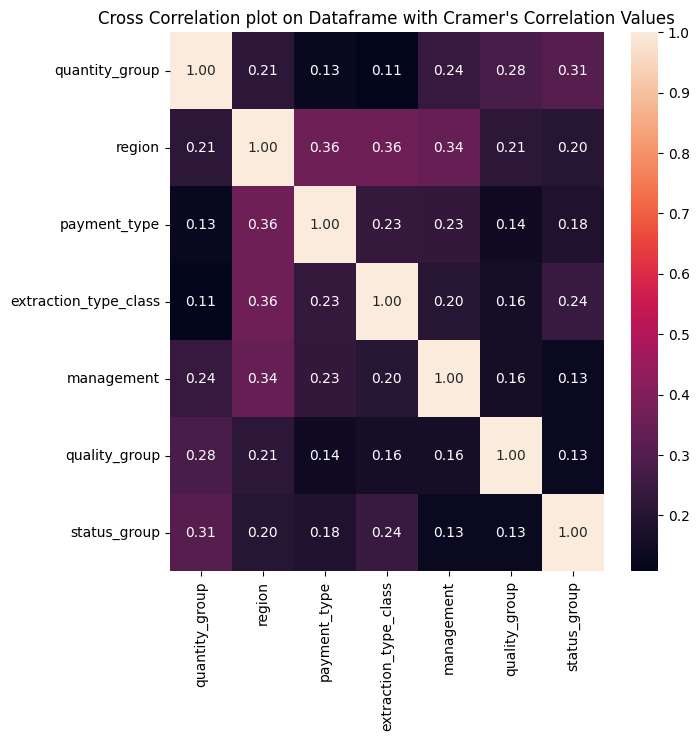

In [135]:
def cramerV(label,x):
    confusion_matrix = pd.crosstab(label, x)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            warnings.warn(
            "Unable to calculate Cramer's V using bias correction. Consider not using bias correction",RuntimeWarning)
            v = 0
            print("If condition Met: ",v)
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
            print("Else condition Met: ",v)
    except:
        print("inside error")
        v = 0
    return v


def plot_cramer(df):
    cramer = pd.DataFrame(index=df.columns,columns=df.columns)
    for column_of_interest in df.columns:
        try:
            temp = {}

            columns = df.columns
            for j in range(0,len(columns)):
                v = cramerV(df[column_of_interest],df[columns[j]])
                cramer.loc[column_of_interest,columns[j]] = v
                if (column_of_interest==columns[j]):
                    pass
                else:
                    temp[columns[j]] = v
            cramer.fillna(value=np.nan,inplace=True)
        except:
            print('Dropping row:',column_of_interest)
            pass
    plt.figure(figsize=(7,7))
    sns.heatmap(cramer,annot=True,fmt='.2f')

    plt.title("Cross Correlation plot on Dataframe with Cramer's Correlation Values")
    plt.show()
    

       
plot_cramer(df_categorical)   